In [9]:
#Importamos las librerías necesarias para realizar el trabajo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

df = pd.read_csv('deuda-externa-privada-bcra.csv', index_col='indice_tiempo')

In [20]:
print("Dimensiones del dataset" + ": " + str(df.shape))

Dimensiones del dataset: (42, 24)


In [24]:
#Chequeamos la cantidad de valores nulos que tenemos por columna para ver si hay que imputar algo. En este caso, está
#completo así que no hace falta completar los datos

for col in df.columns:
    print(col + " " + str(df[col].isna().sum()))

total 0
por_categoria_deuda_comercial 0
anticipos_prefinanciacion_bienes 0
deuda_por_importacion_bienes 0
deuda_comercial_servicios 0
deuda_comercial_lineas_credito 0
por_categoria_deuda_financiera 0
deuda_financiera_prestamos_financieros 0
prestamos_financieros_titulos_deuda 0
deuda_financiera_por_utilidades_dividendos 0
deuda_financiera_linea_credito_financiera 0
deuda_financiera_otras_deudas 0
por_acreedor_clientes_del_exterior 0
por_acreedor_proveedores_del_exterior 0
por_acreedor_empresas_del_mismo_grupo 0
por_acreedor_entidades_financieras_internacionales 0
por_acreedor_multiples_tenedores_titulos 0
por_acreedor_organismos_internacionales_agencias_oficiales 0
por_acreedor_otros 0
en_porcentaje_del_pib 0
en_porcentaje_rrii 0
en_porcentaje_las_exportaciones 0
total_comercial 0
total_financiera 0


In [16]:
df.head(10)

,total,por_categoria_deuda_comercial,anticipos_prefinanciacion_bienes,deuda_por_importacion_bienes,deuda_comercial_servicios,deuda_comercial_lineas_credito,por_categoria_deuda_financiera,deuda_financiera_prestamos_financieros,prestamos_financieros_titulos_deuda,deuda_financiera_por_utilidades_dividendos,...,por_acreedor_empresas_del_mismo_grupo,por_acreedor_entidades_financieras_internacionales,por_acreedor_multiples_tenedores_titulos,por_acreedor_organismos_internacionales_agencias_oficiales,por_acreedor_otros,en_porcentaje_del_pib,en_porcentaje_rrii,en_porcentaje_las_exportaciones,total_comercial,total_financiera
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2007-04-01,50680.001316,17064.541139,4531.647132,10258.814424,2089.648704,184.430879,33615.460178,16502.361029,13935.315979,1111.474222,...,16891.166052,9372.798112,12691.869061,1971.305987,1874.219159,0.197295,1.174313,0.865287,60773.110434,89295.587528
2007-07-01,51736.080823,18702.350995,5119.791786,11023.029675,2287.490695,272.038838,33033.729829,16949.371958,12735.901971,692.774323,...,17232.810373,10238.136814,11550.193989,2390.413839,1971.408180,0.191149,1.206211,0.844609,64962.038171,87855.790461
2007-10-01,51526.964665,18926.301425,4614.365456,11528.087389,2451.256464,332.592115,32600.663240,16649.737011,12082.596829,902.821563,...,16775.125467,10643.204468,11158.158595,2373.626712,1641.005328,0.179043,1.116121,0.779268,65204.577739,87002.689544
2008-01-01,54167.944150,20701.099025,4872.780467,12670.373150,2676.173657,481.771751,33466.845125,17264.730924,12038.882048,1044.277335,...,17643.305408,11523.529775,11150.120193,2594.026325,1791.466686,0.176366,1.073403,0.759127,70302.465906,89607.340219
2008-04-01,58351.049733,24606.742251,5703.893489,15559.295616,2712.452748,631.100397,33744.307482,18121.134983,11243.028588,1112.161900,...,19481.691012,12657.070654,10464.109126,2576.649853,1816.326902,0.176265,1.228035,0.771697,81866.704602,90609.794743
2008-07-01,59924.745566,25951.999466,6011.643734,16351.160662,2862.198766,726.996304,33972.746101,19063.436889,10985.470267,1000.770281,...,20885.863908,13130.581085,10266.044268,2690.944323,1721.419719,0.168639,1.271711,0.721286,85741.174821,91342.117554
2008-10-01,57729.418207,24102.803656,5080.146211,15689.590435,2887.192455,445.874556,33626.614551,19162.802586,10372.945244,1463.169057,...,21041.841391,11763.075425,9726.934877,2816.331676,1665.010667,0.158607,1.244546,0.707610,81628.683541,88743.239403
2009-01-01,54643.079515,22359.303280,5164.135942,13955.992278,3004.248368,234.926692,32283.776235,18811.623249,9726.577028,1484.137770,...,20198.263345,10777.238398,9132.572582,2819.382728,1687.755536,0.151545,1.174892,0.707065,76632.492367,84477.363450
2009-04-01,54754.255509,22915.532265,5878.382084,13914.677801,2948.921176,173.551203,31838.723244,18927.747535,9234.510004,1515.659927,...,20277.502116,10816.117310,8642.494708,2931.022728,1637.215246,0.157682,1.189630,0.729851,78195.685293,83136.058506


In [25]:
df = df.loc['2007-04-01':'2017-07-01', :]
df.index = pd.to_datetime(df.index)
df['total_comercial'] = df['por_categoria_deuda_comercial'] + df['anticipos_prefinanciacion_bienes'] + df['deuda_por_importacion_bienes'] + df['deuda_comercial_servicios'] + df['deuda_comercial_lineas_credito'] + df['por_acreedor_clientes_del_exterior'] +  df['por_acreedor_proveedores_del_exterior'] +  df['por_acreedor_empresas_del_mismo_grupo'] +  df['por_acreedor_otros'] 
df['total_financiera'] = df['por_categoria_deuda_financiera'] + df['deuda_financiera_prestamos_financieros'] + df['prestamos_financieros_titulos_deuda'] + df['deuda_financiera_por_utilidades_dividendos'] + df['deuda_financiera_linea_credito_financiera'] + df['deuda_financiera_otras_deudas'] + df['por_acreedor_entidades_financieras_internacionales'] + df['por_acreedor_multiples_tenedores_titulos']

In [27]:
df['total_comercial']

indice_tiempo
2007-04-01     60773.110434
2007-07-01     64962.038171
2007-10-01     65204.577739
2008-01-01     70302.465906
2008-04-01     81866.704602
2008-07-01     85741.174821
2008-10-01     81628.683541
2009-01-01     76632.492367
2009-04-01     78195.685293
2009-07-01     77677.489192
2009-10-01     73910.437989
2010-01-01     76505.861398
2010-04-01     84674.369216
2010-07-01     89260.038024
2010-10-01     91357.119792
2011-01-01     97933.168078
2011-04-01    109277.806855
2011-07-01    111126.800121
2011-10-01    113849.912712
2012-01-01    117544.390235
2012-04-01    125459.954570
2012-07-01    124220.339717
2012-10-01    119887.566532
2013-01-01    122246.829696
2013-04-01    127048.256986
2013-07-01    126826.816749
2013-10-01    120994.924262
2014-01-01    124676.804448
2014-04-01    124910.852024
2014-07-01    121177.894925
2014-10-01    119552.766915
2015-01-01    124671.488386
2015-04-01    133348.602503
2015-07-01    132038.364332
2015-10-01    129207.993672
2016-0

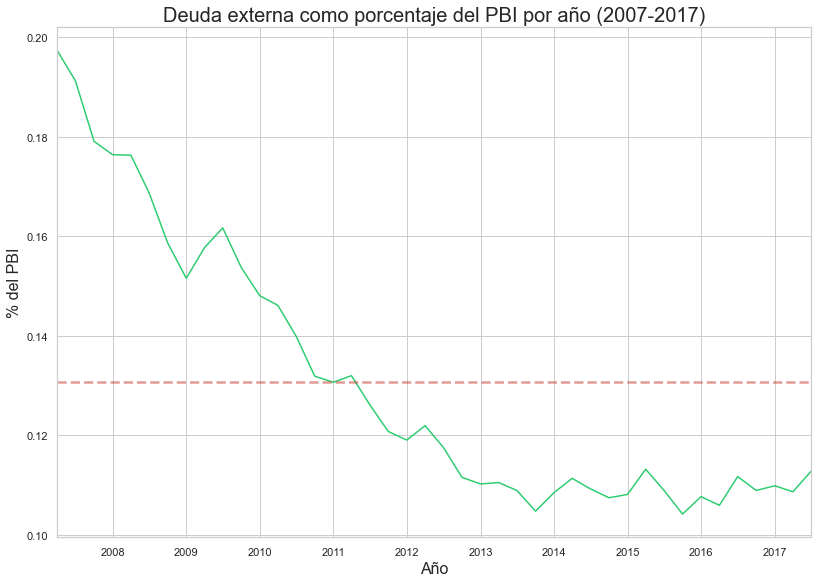

In [30]:
df['en_porcentaje_del_pib_mean'] = df['en_porcentaje_del_pib'].mean()

sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(11.69, 8.27))
plt.plot(df.index, df['en_porcentaje_del_pib'], color='#2ECC71')
plt.plot(df.index, df['en_porcentaje_del_pib_mean'], color='#C0392B', alpha=0.5, linestyle='--', linewidth=2.5)

plt.title('Deuda externa como porcentaje del PBI por año (2007-2017)', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Año', size=16)
plt.ylabel('% del PBI', size=16)

plt.tight_layout()

plt.xlim('2007-04-01', '2017-07-01')

plt.savefig('deudas_porcentaje_pbi.png')

plt.show()

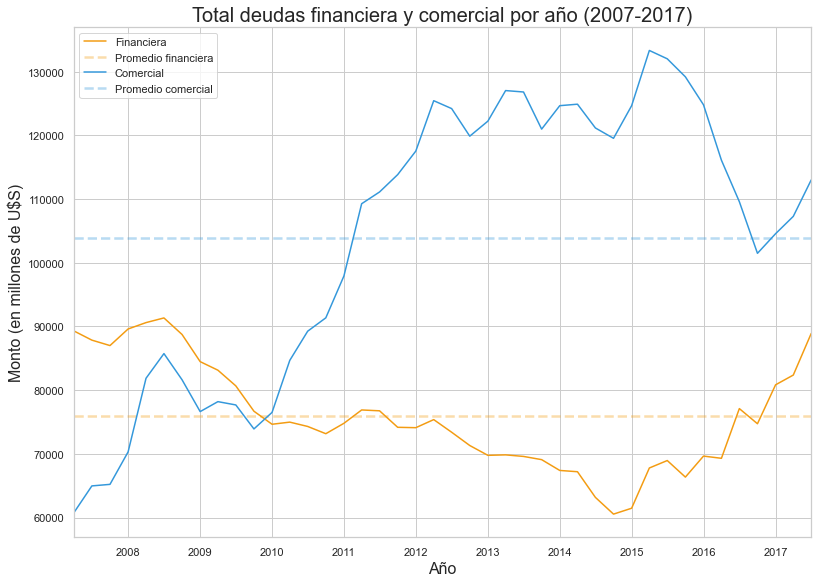

In [31]:
df['total_financiera_mean'] = df['total_financiera'].mean()
df['total_comercial_mean'] = df['total_comercial'].mean()

sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(11.69, 8.27))
plt.plot(df.index, df['total_financiera'], label='Financiera', color='#F39C12')
plt.plot(df.index, df['total_financiera_mean'], label='Promedio financiera', linestyle='--', alpha=0.35, linewidth=2.5, color='#F39C12')
plt.plot(df.index, df['total_comercial'], label='Comercial', color='#3498DB')
plt.plot(df.index, df['total_comercial_mean'], label='Promedio comercial', linestyle='--', alpha=0.35, linewidth=2.5, color='#3498DB')


plt.title('Total deudas financiera y comercial por año (2007-2017)', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Año', size=16)
plt.ylabel('Monto (en millones de U$S)', size=16)

plt.legend()

plt.tight_layout()
plt.xlim('2007-04-01', '2017-07-01')

plt.savefig('deudas_total.png')

plt.show()